In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [13]:
## Load the data
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
df = pd.read_csv(movie_url, index_col=0, parse_dates=['release_date'])
df.head(3)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [15]:
## Filter out movie population of interest and remove nulls
## keeping only movies released after 2000 and before 2020
df = df[(df['release_date'] > "2000") & (df['release_date'] <"2020")]
df = df.dropna(subset=['runtime'])
df.head(3)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


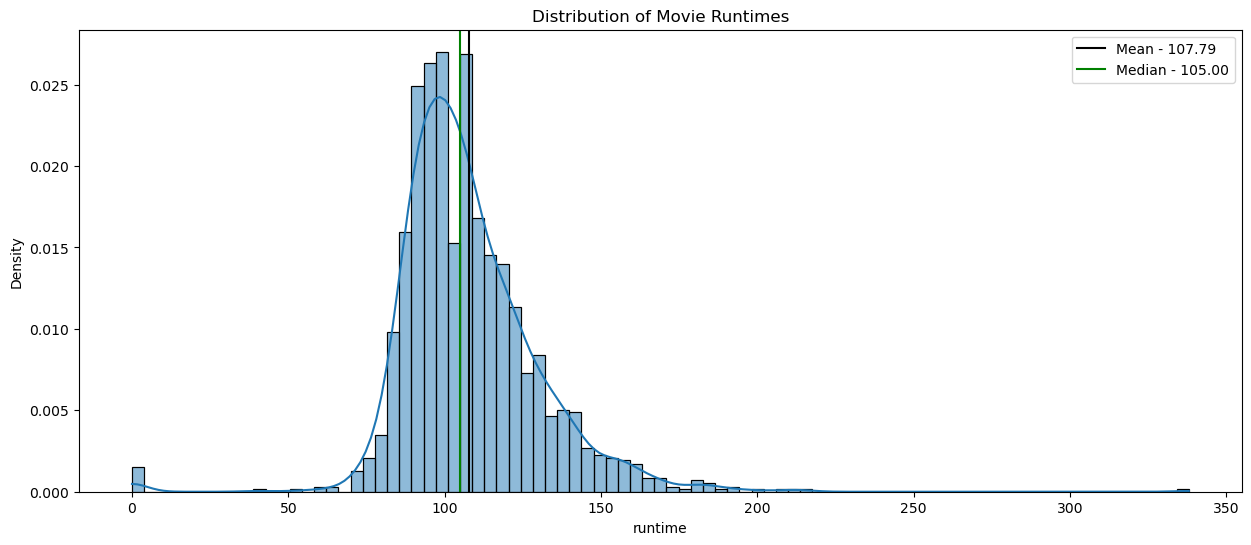

In [18]:
## Slice out data and calc stats
data = df["runtime"].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(data, stat="density", kde=True)
## Annotate mean and median
ax.axvline(mean, color="black", label=f"Mean - {mean:,.2f}")
ax.axvline(med, color="green", label=f"Median - {med:,.2f}")
ax.set_title("Distribution of Movie Runtimes")
ax.legend();

# Comparing Samples to the "Population"

## Sample A

In [20]:
np.random.seed(42)
n = 20
## sampling 20 values from data without replacement
sampleA = np.random.choice(data, size=n, replace=False)
sampleA

array([164.,  98., 113., 186.,  84., 114., 106.,  91., 125., 117.,  94.,
        90., 152.,  92.,  93.,  85., 116.,  87.,  87., 117.])

### Descriptive Statistics


In [21]:
# calculate descriptive stats
sampleA_mean = np.mean(sampleA)
sampleA_med = np.median(sampleA)
sampleA_std = np.std(sampleA)

### Visualization

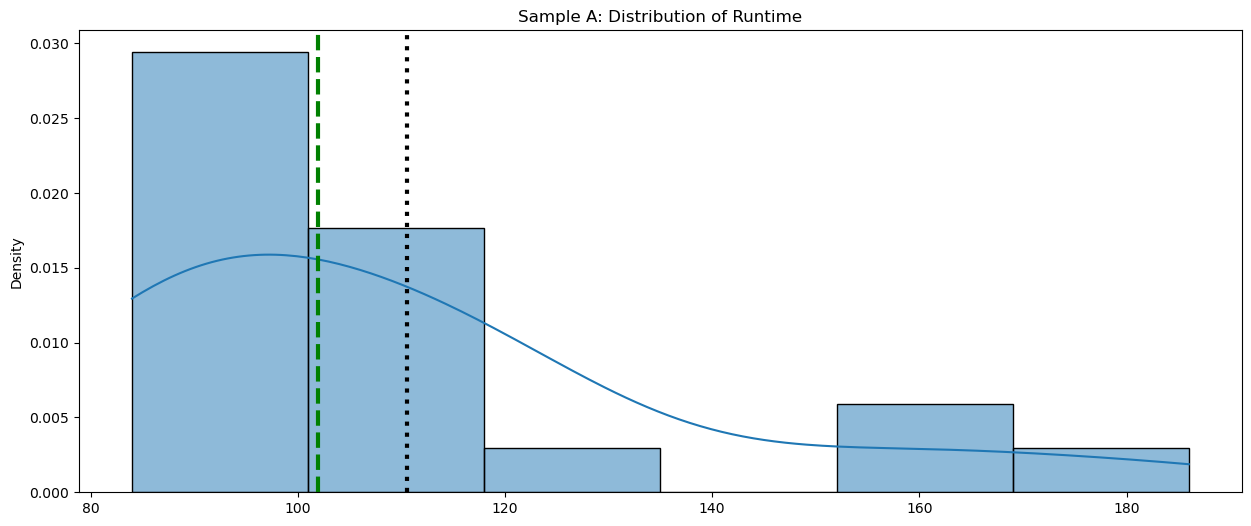

In [24]:
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(sampleA, stat="density", kde=True)
ax.set_title("Sample A: Distribution of Runtime")
ax.axvline(sampleA_mean, color="black", ls=":", lw=3, label=f"Mean - {sampleA_mean:,.2f}")
ax.axvline(sampleA_med, color="green", ls="--", lw=3, label=f"Median = {sampleA_med:,.2f}");

### Test for normality

In [25]:
result = stats.normaltest(sampleA)
print(result)
result.pvalue < .05

NormaltestResult(statistic=9.734874928264695, pvalue=0.00769305377712739)


True

Sample A is NOT normally distributed.

# Sample B

In [26]:
np.random.seed(32)
n = 20
## sampling 20 values from data without replacement
sampleB = np.random.choice(data, size=n, replace=False)
sampleB

array([125.,  87., 120.,  88., 121.,  90., 125., 109., 106., 165., 100.,
       107.,  91., 107., 129., 132., 100., 132.,  82., 107.])

## Descriptive Statistics


In [27]:
sampleB_mean = np.mean(sampleB)
sampleB_med = np.median(sampleB)
sampleB_std = np.std(sampleB)

## Visualization



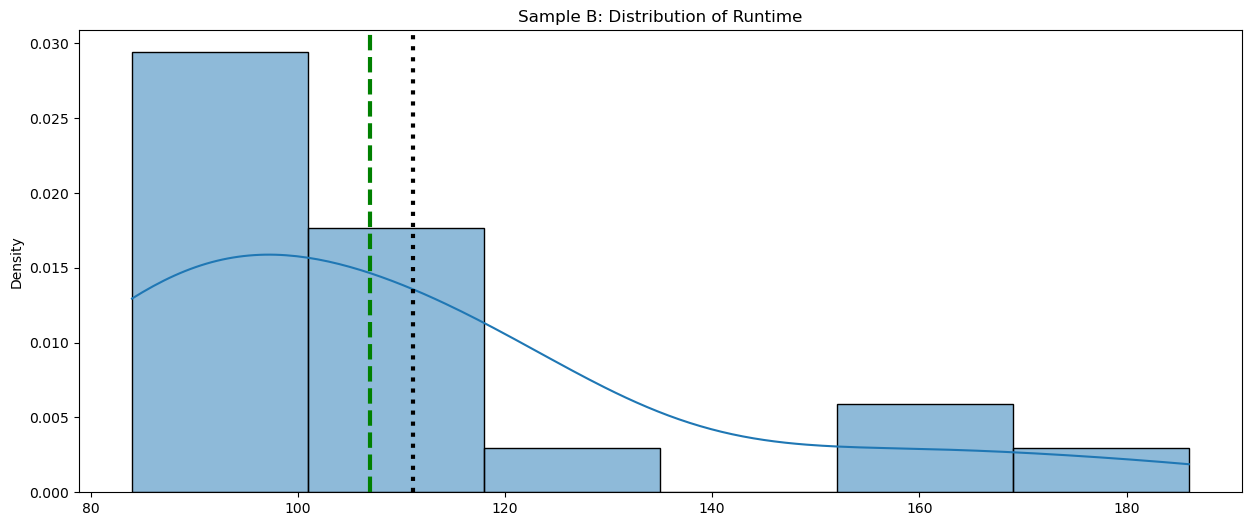

In [29]:
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(sampleA, stat="density", kde=True)
ax.set_title("Sample B: Distribution of Runtime")
## Annotate mean and median
ax.axvline(sampleB_mean, color="black", ls=":", lw=3, label=f"Mean - {sampleB_mean:,.2f}")
ax.axvline(sampleB_med, color="green", ls="--", lw=3, label=f"Median - {sampleB_med:,.2f}");

### Test for Normality

In [30]:
result = stats.normaltest(sampleB)
print(result)
result.pvalue < .05

NormaltestResult(statistic=3.879444116188468, pvalue=0.14374389667857196)


False

In the case of sample B, we can see that our sample IS normally distributed even though the population is NOT.

Q: How can we get a sample that is a better representation of the population?

By increasing the sample size.
By taking multiple small samples.
You'll learn more about how this works in a future lesson.
Now, take a sample of 100 movies and repeat the calculations and visualizations as we did above.

In [38]:
np.random.seed(32)
n = 100
# sampling 100 values from data without replacement
sample = np.random.choice(data, size=n, replace=False)
# calc stats
samp_mean = np.mean(sample)
samp_med = np.median(sample)
samp_std = np.std(sample)
#Set the range and spacing for the x-axis
x_range = np.linspace( np.min(data), np.max(data), num=10000)
#Define x scale, mean and std for the normal curve to be plotted
pdf = stats.norm.pdf(x_range, loc=np.mean(data),
                     scale = np.std(data))

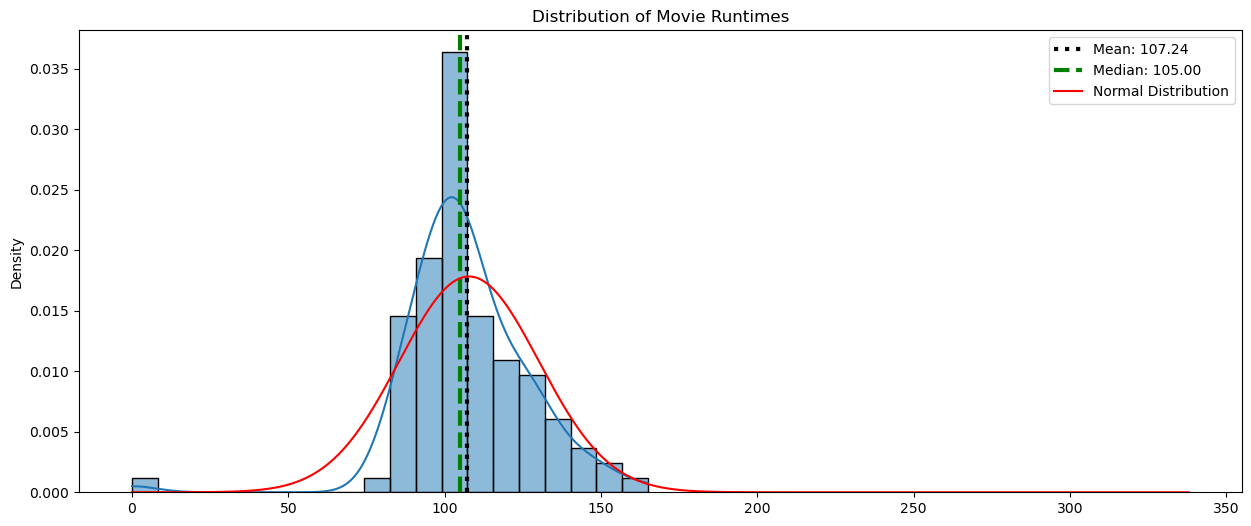

In [39]:
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sample,kde=True,stat='density')
ax.set_title('Distribution of Movie Runtimes')
## Annotate mean and median
ax.axvline(samp_mean, ls=':', color='black', lw=3, label =f"Mean: {samp_mean:.2f}")
ax.axvline(samp_med,ls='--', color='green', lw=3, label =f"Median: {samp_med:.2f}")
## Add pdf for normal curve
ax.plot(x_range, pdf,color='red',label='Normal Distribution')
ax.legend();

In [41]:
result = stats.normaltest(sample)
print(result)
result.pvalue < .05

NormaltestResult(statistic=37.233728564765755, pvalue=8.218613776872242e-09)


True